In [1]:
from getQuantity import getvr3D, getDen3D, getMDot3DPlus
from read_penguin import load_3D_data, cell_center, load_2D_data
import Geometry as geo
import numpy as np
from matplotlib import pyplot as plt
from Numerics import *
from time import time

In [2]:
planetCoords = (1,np.pi,np.pi/2)
xp, yp, zp = geo.sphericalToCartesian(planetCoords, dim = 3)
planetVel = (0,1,0)

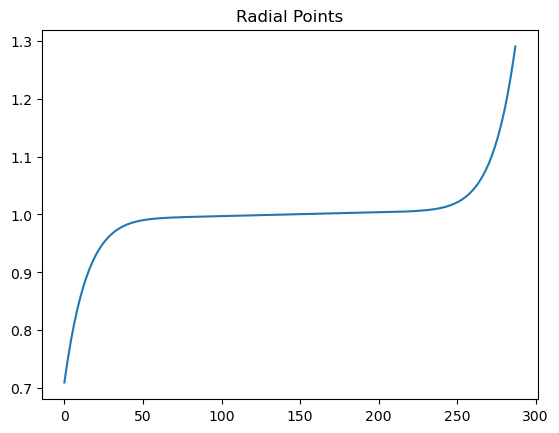

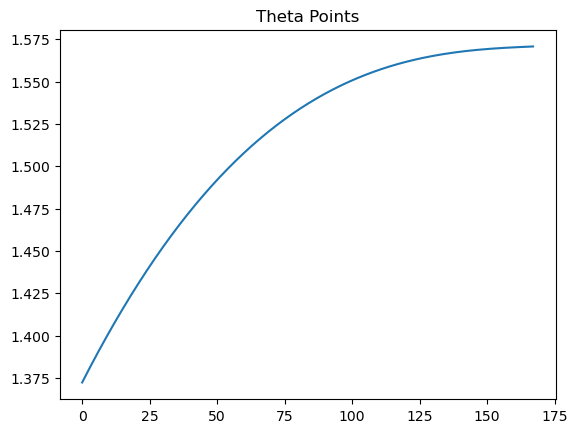

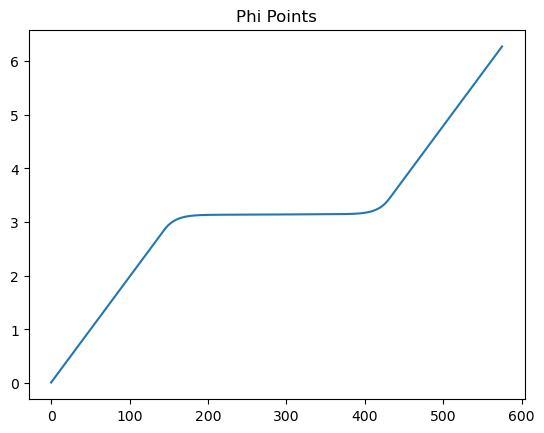

In [3]:
xres3d = 288
yres3d = 576
zres3d = 168

orbit = 2
data = load_3D_data("/scratch/afkirby/", xres3d, yres3d, zres3d, "h50_1p10E_e0_PPM4", orbit)
adata = load_3D_data("/scratch/afkirby/ChoksiAdiabatic/", xres3d, yres3d, zres3d, "h50_1p10E_e0_PPM4", orbit)
acdata = load_3D_data("/scratch/afkirby/ChoksiAdiabatic/", xres3d, yres3d, zres3d, "h50_1p10E_e0_b3_PPM4", orbit)

rGrid = cell_center(data[1])
phiGrid = cell_center(data[2])
thetaGrid = cell_center(data[3])

plt.plot(rGrid, label = "r")
plt.title("Radial Points")
plt.show()
plt.figure()
plt.plot(thetaGrid, label = 'theta')
plt.title("Theta Points")
plt.show()
plt.figure()
plt.plot(phiGrid, label = 'phi')
plt.title("Phi Points")
plt.show()

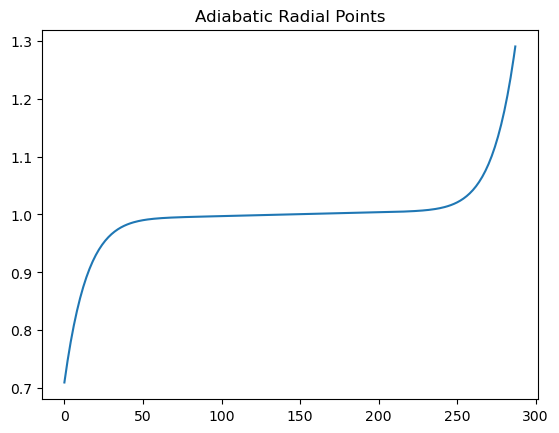

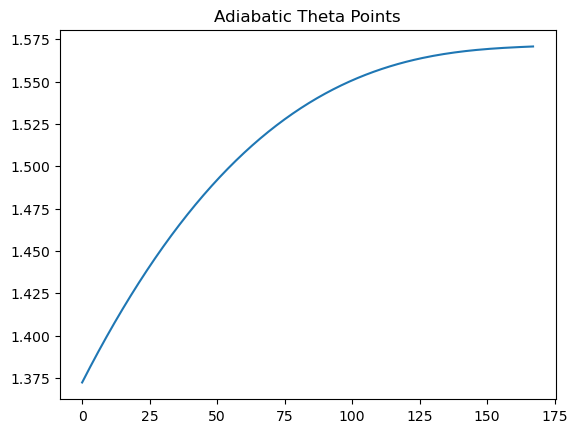

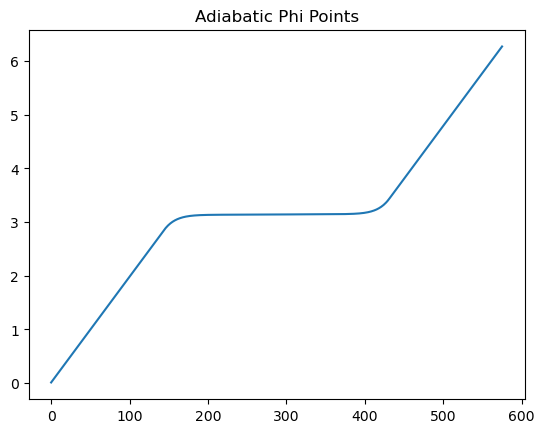

In [4]:
arGrid = cell_center(adata[1])
aphiGrid = cell_center(adata[2])
athetaGrid = cell_center(adata[3])

plt.plot(arGrid, label = "r")
plt.title("Adiabatic Radial Points")
plt.show()
plt.figure()
plt.plot(athetaGrid, label = 'theta')
plt.title("Adiabatic Theta Points")
plt.show()
plt.figure()
plt.plot(aphiGrid, label = 'phi')
plt.title("Adiabatic Phi Points")
plt.show()

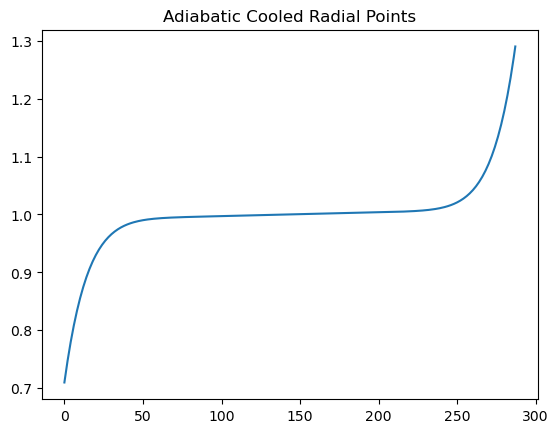

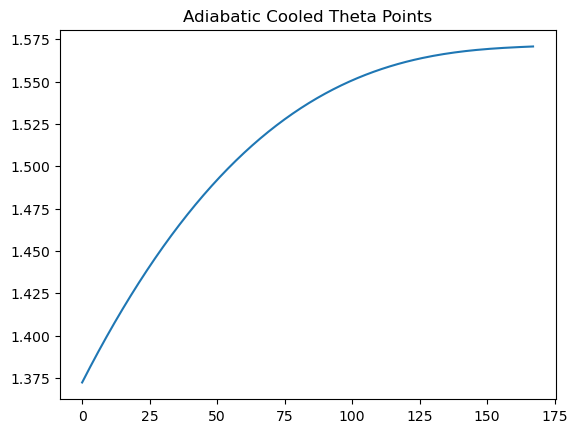

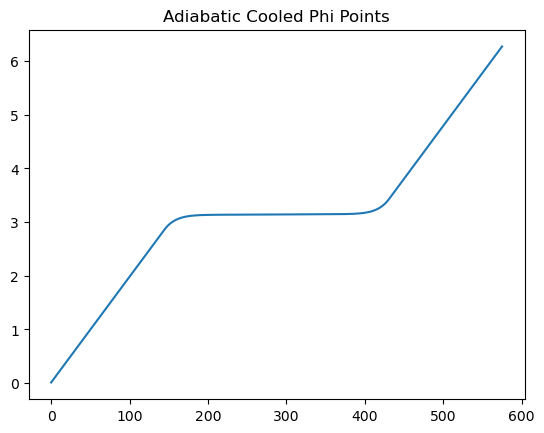

In [5]:
acrGrid = cell_center(acdata[1])
acphiGrid = cell_center(acdata[2])
acthetaGrid = cell_center(acdata[3])

plt.plot(acrGrid, label = "r")
plt.title("Adiabatic Cooled Radial Points")
plt.show()
plt.figure()
plt.plot(acthetaGrid, label = 'theta')
plt.title("Adiabatic Cooled Theta Points")
plt.show()
plt.figure()
plt.plot(acphiGrid, label = 'phi')
plt.title("Adiabatic Cooled Phi Points")
plt.show()

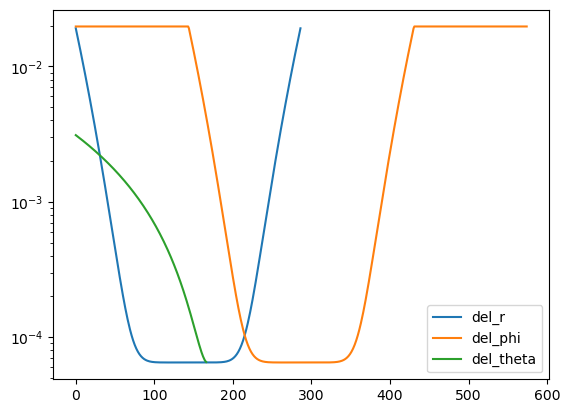

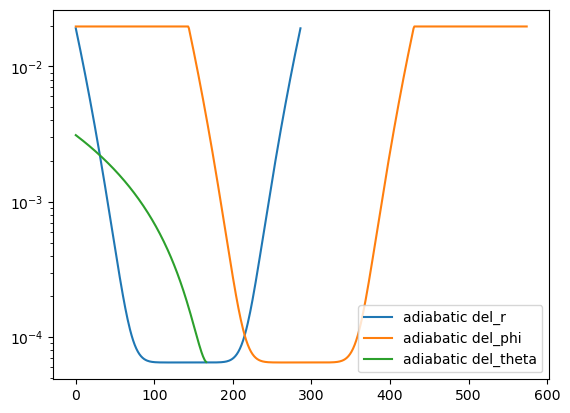

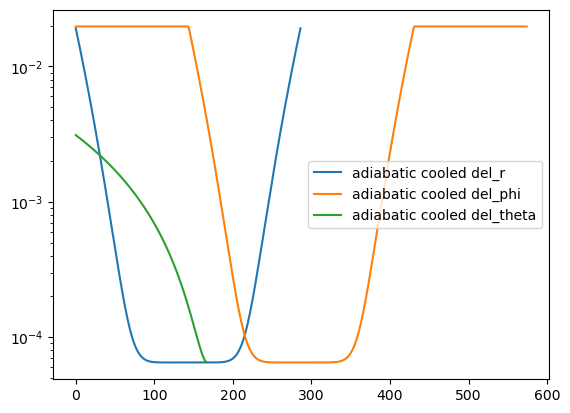

In [6]:
deltaR = np.diff(rGrid)
deltaPhi = np.diff(phiGrid)
deltaTheta = np.diff(thetaGrid)
plt.plot(deltaR, label = 'del_r')
plt.plot(deltaPhi, label = 'del_phi')
plt.plot(deltaTheta, label = 'del_theta')
plt.yscale('log')
plt.legend()
plt.show()

adeltaR = np.diff(arGrid)
adeltaPhi = np.diff(aphiGrid)
adeltaTheta = np.diff(athetaGrid)
plt.plot(adeltaR, label = 'adiabatic del_r')
plt.plot(adeltaPhi, label = 'adiabatic del_phi')
plt.plot(adeltaTheta, label = 'adiabatic del_theta')
plt.yscale('log')
plt.legend()
plt.show()

acdeltaR = np.diff(acrGrid)
acdeltaPhi = np.diff(acphiGrid)
acdeltaTheta = np.diff(acthetaGrid)
plt.plot(acdeltaR, label = 'adiabatic cooled del_r')
plt.plot(acdeltaPhi, label = 'adiabatic cooled del_phi')
plt.plot(acdeltaTheta, label = 'adiabatic cooled del_theta')
plt.yscale('log')
plt.legend()
plt.show()

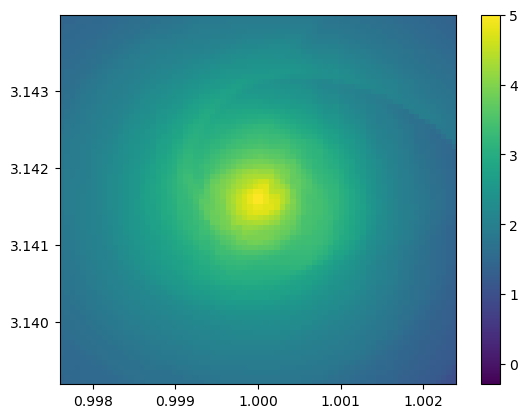

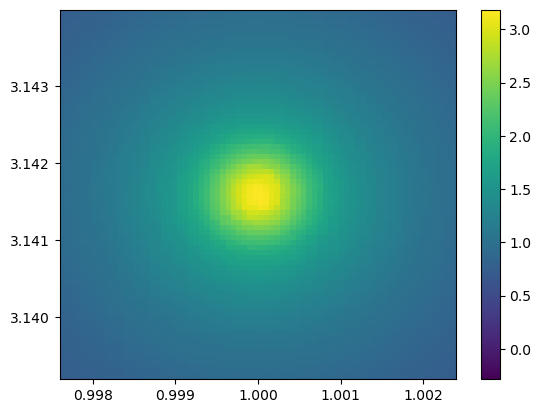

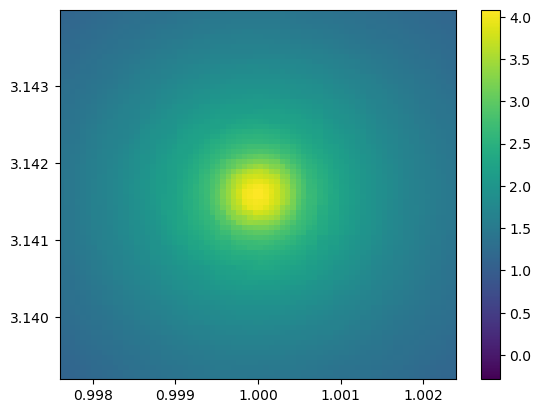

In [7]:
q = 0.00003
h = 0.05
qth = q/h**3
#qth = 0.1
rb3 = qth*h
rh3 = (1/3)**(1/3)*qth**(-2/3)*rb3
choksi = 3.5*qth**2*h**3


N = 100
vr = np.zeros((N, N))
dens = np.zeros((N,N))
mdots = np.zeros((N,N))
long = np.linspace(0, 2*np.pi, N)
lat = np.linspace(0, np.pi/2, N)

plt.figure()
plt.pcolormesh(data[1], data[2], np.log10(data[4][-1, :, :]))
plt.colorbar()
plt.ylim(np.pi - 0.2*rb3, np.pi + 0.2*rb3)
plt.xlim(1 - 0.2*rb3, 1 + 0.2*rb3)
plt.show()


avr = np.zeros((N, N))
adens = np.zeros((N,N))
amdots = np.zeros((N,N))
along = np.linspace(0, 2*np.pi, N)
alat = np.linspace(0, np.pi/2, N)

plt.figure()
plt.pcolormesh(adata[1], adata[2], np.log10(adata[4][-1, :, :]))
plt.colorbar()
plt.ylim(np.pi - 0.2*rb3, np.pi + 0.2*rb3)
plt.xlim(1 - 0.2*rb3, 1 + 0.2*rb3)
plt.show()

acvr = np.zeros((N, N))
acdens = np.zeros((N,N))
acmdots = np.zeros((N,N))
aclong = np.linspace(0, 2*np.pi, N)
aclat = np.linspace(0, np.pi/2, N)

plt.figure()
plt.pcolormesh(acdata[1], acdata[2], np.log10(acdata[4][-1, :, :]))
plt.colorbar()
plt.ylim(np.pi - 0.2*rb3, np.pi + 0.2*rb3)
plt.xlim(1 - 0.2*rb3, 1 + 0.2*rb3)
plt.show()

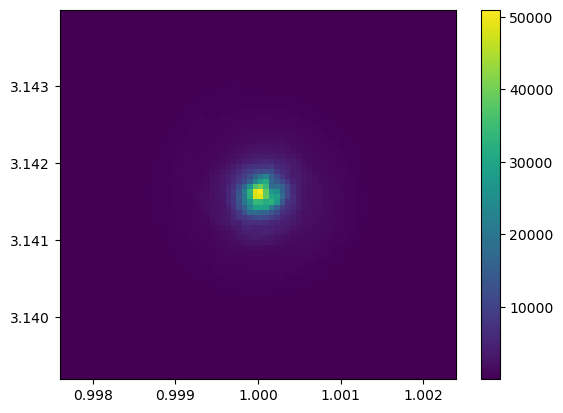

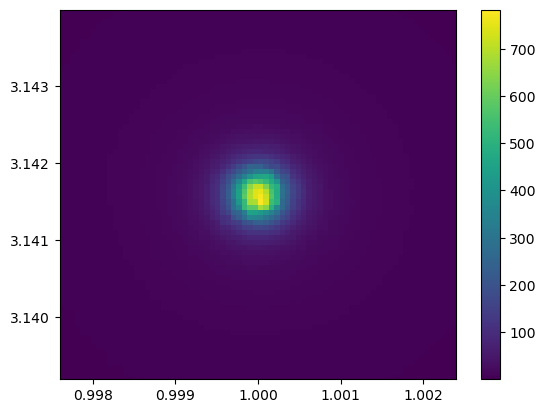

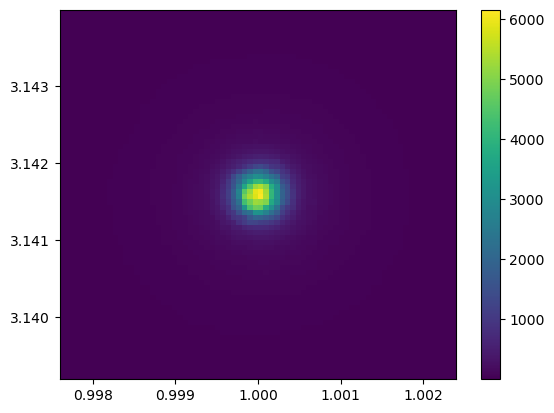

In [8]:
plt.figure()
vSq = data[6]**2 + data[7]**2 + data[8]**2
plt.pcolormesh(data[1], data[2], 0.5*(vSq*data[4])[-1,:,:])
plt.colorbar()
plt.ylim(np.pi - 0.2*rb3, np.pi + 0.2*rb3)
plt.xlim(1 - 0.2*rb3, 1 + 0.2*rb3)
plt.show()

plt.figure()
avSq = adata[6]**2 + adata[7]**2 + adata[8]**2
plt.pcolormesh(adata[1], adata[2], 0.5*(avSq*adata[4])[-1,:,:])
plt.colorbar()
plt.ylim(np.pi - 0.2*rb3, np.pi + 0.2*rb3)
plt.xlim(1 - 0.2*rb3, 1 + 0.2*rb3)
plt.show()

plt.figure()
acvSq = acdata[6]**2 + acdata[7]**2 + acdata[8]**2
plt.pcolormesh(acdata[1], acdata[2], 0.5*(acvSq*acdata[4])[-1,:,:])
plt.colorbar()
plt.ylim(np.pi - 0.2*rb3, np.pi + 0.2*rb3)
plt.xlim(1 - 0.2*rb3, 1 + 0.2*rb3)
plt.show()

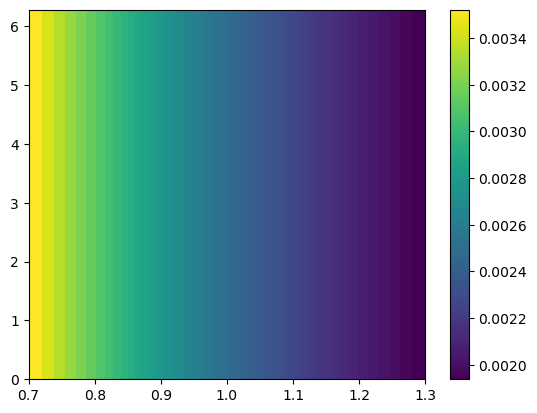

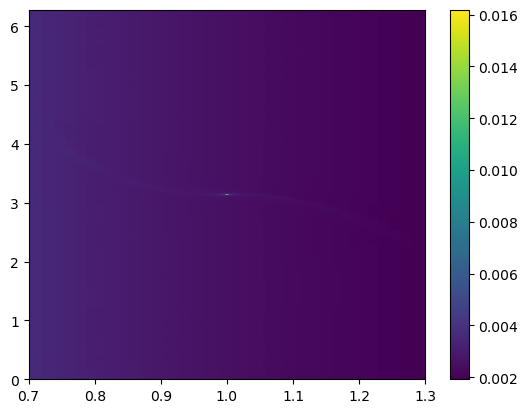

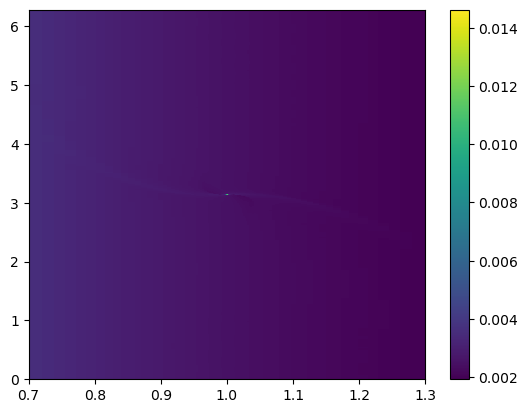

In [9]:
plt.figure()
T = data[5][-1, :, :]/data[4][-1,:,:]
plt.pcolormesh(data[1], data[2], T)
plt.colorbar()
plt.show()

plt.figure()
aT = adata[5][-1, :, :]/adata[4][-1,:,:]
plt.pcolormesh(adata[1], adata[2], aT)
plt.colorbar()
plt.show()

plt.figure()
acT = acdata[5][-1, :, :]/acdata[4][-1,:,:]
plt.pcolormesh(acdata[1], acdata[2], acT)
plt.colorbar()
plt.show()

In [10]:
for i in range(N):
    for j in range(N):
        coords = (rb3, long[i], lat[j])
        vr[i,j] = getvr3D(coords, planetCoords, planetVel, data)
        dens[i,j] = getDen3D(rb3, long[i], lat[j], data, planetCoords)
        mdots[i,j] = -vr[i,j]*dens[i,j]*rb3**2*np.sin(coords[2])
        
        acoords = (rb3, along[i], alat[j])
        avr[i,j] = getvr3D(acoords, planetCoords, planetVel, adata)
        adens[i,j] = getDen3D(rb3, along[i], alat[j], adata, planetCoords)
        amdots[i,j] = -avr[i,j]*adens[i,j]*rb3**2*np.sin(acoords[2])
        
        accoords = (rb3, aclong[i], aclat[j])
        acvr[i,j] = getvr3D(accoords, planetCoords, planetVel, acdata)
        acdens[i,j] = getDen3D(rb3, aclong[i], aclat[j], acdata, planetCoords)
        acmdots[i,j] = -acvr[i,j]*acdens[i,j]*rb3**2*np.sin(accoords[2])

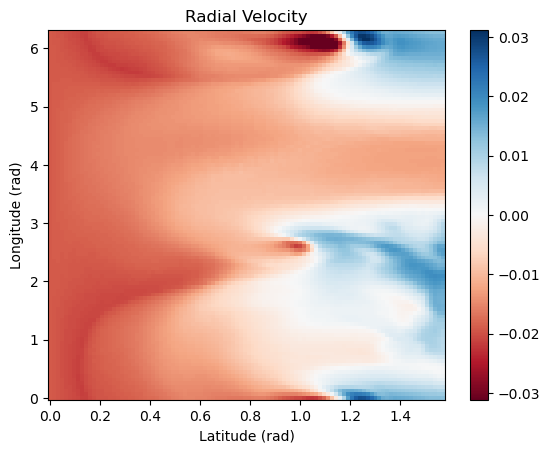

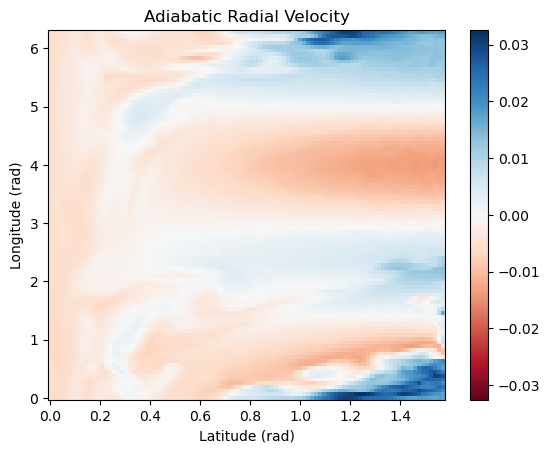

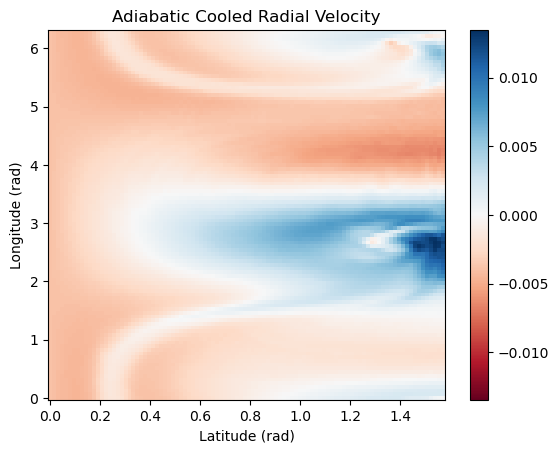

In [27]:
plt.figure()
plt.pcolormesh(lat, long, vr, cmap = 'RdBu')
plt.clim(-np.max(vr), np.max(vr))
plt.colorbar()
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
#plt.ylim(0.95*np.pi/2, np.pi/2)
#plt.xlim(0.95*np.pi, 1.05*np.pi)
plt.title("Radial Velocity")
plt.show()

plt.figure()
plt.pcolormesh(alat, along, avr, cmap = 'RdBu')
plt.colorbar()
plt.clim(-np.max(avr), np.max(avr))
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
#plt.ylim(0.95*np.pi/2, np.pi/2)
#plt.xlim(0.95*np.pi, 1.05*np.pi)
plt.title("Adiabatic Radial Velocity")
plt.show()

plt.figure()
plt.pcolormesh(aclat, aclong, acvr, cmap = 'RdBu')
plt.colorbar()
plt.clim(-np.max(acvr), np.max(acvr))
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
#plt.ylim(0.95*np.pi/2, np.pi/2)
#plt.xlim(0.95*np.pi, 1.05*np.pi)
plt.title("Adiabatic Cooled Radial Velocity")
plt.show()

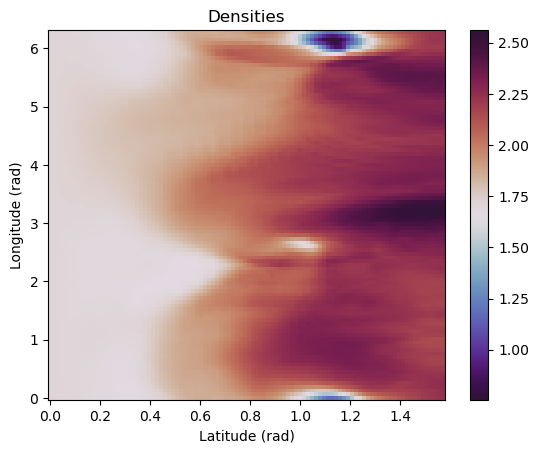

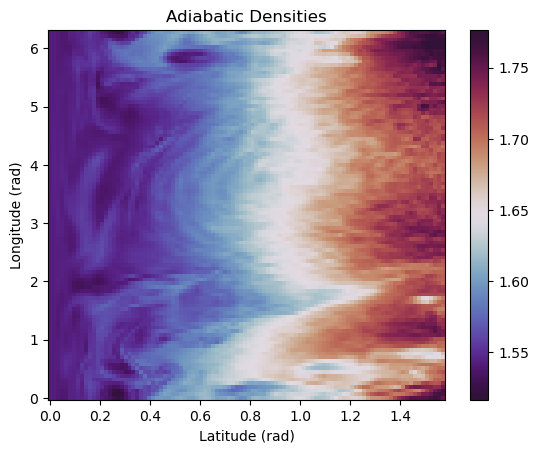

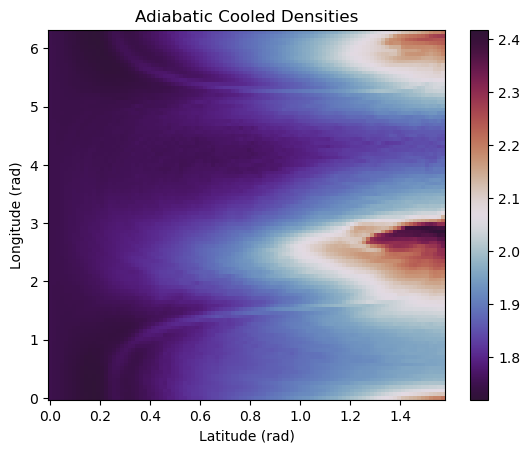

In [12]:
plt.figure()
plt.pcolormesh(lat, long, dens, cmap = 'twilight_shifted')
plt.colorbar()
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
plt.title("Densities")
plt.show()

plt.figure()
plt.pcolormesh(alat, along, adens, cmap = 'twilight_shifted')
plt.colorbar()
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
plt.title("Adiabatic Densities")
plt.show()

plt.figure()
plt.pcolormesh(aclat, aclong, acdens, cmap = 'twilight_shifted')
plt.colorbar()
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
plt.title("Adiabatic Cooled Densities")
plt.show()

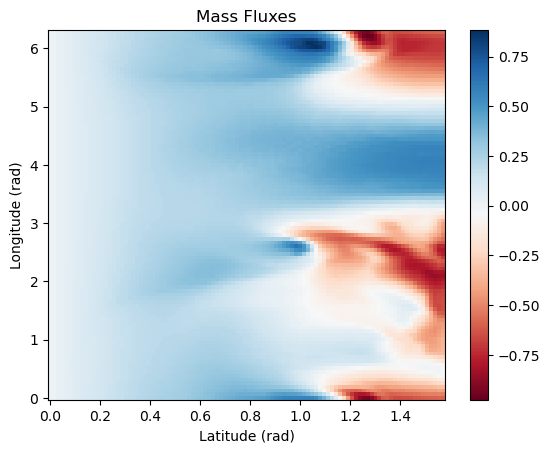

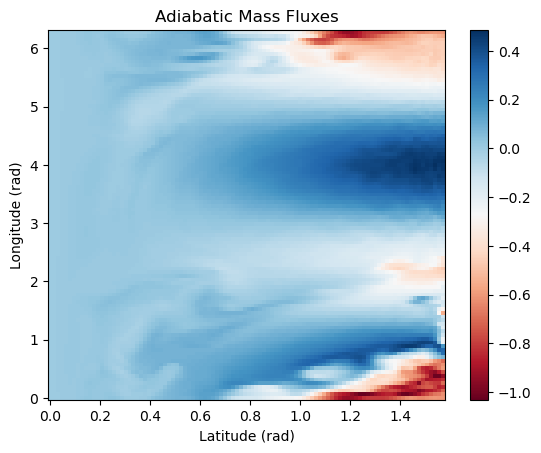

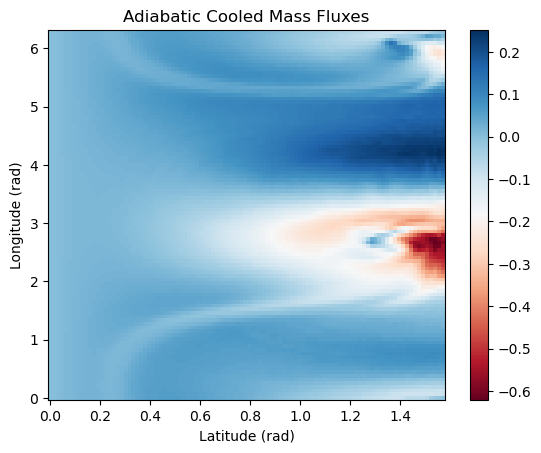

In [13]:
plt.figure()
plt.pcolormesh(lat, long, np.array(mdots)/(qth**2*h**3), cmap = 'RdBu')
plt.colorbar()
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
plt.title("Mass Fluxes")
plt.show()

plt.figure()
plt.pcolormesh(alat, along, np.array(amdots)/(qth**2*h**3), cmap = 'RdBu')
plt.colorbar()
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
plt.title("Adiabatic Mass Fluxes")
plt.show()

plt.figure()
plt.pcolormesh(aclat, aclong, np.array(acmdots)/(qth**2*h**3), cmap = 'RdBu')
plt.colorbar()
plt.ylabel("Longitude (rad)")
plt.xlabel("Latitude (rad)")
plt.title("Adiabatic Cooled Mass Fluxes")
plt.show()

In [14]:
print(getMDot3DPlus(min(rb3, rh3), 201, 201, planetCoords, planetVel, data)/(qth**2*h**3))
print(getMDot3DPlus(min(rb3, rh3), 201, 201, planetCoords, planetVel, adata)/(qth**2*h**3))
print(getMDot3DPlus(min(rb3, rh3), 201, 201, planetCoords, planetVel, acdata)/(qth**2*h**3))

3.62911003336426
1.2897420745644823
0.7607678514428983


In [15]:
frames = 13
mdots = []
amdots = []
for i in range(1, frames):
    tdata = load_3D_data("/scratch/afkirby/", xres3d, yres3d, zres3d, "h50_1p10E_e0_PPM4", i)
    mdots.append(getMDot3DPlus(min(rb3, rh3), 101, 101, planetCoords, planetVel, tdata))
    atdata = load_3D_data("/scratch/afkirby/ChoksiAdiabatic/", xres3d, yres3d, zres3d, "h50_1p10E_e0_PPM4", i)
    amdots.append(getMDot3DPlus(min(rb3, rh3), 101, 101, planetCoords, planetVel, atdata))

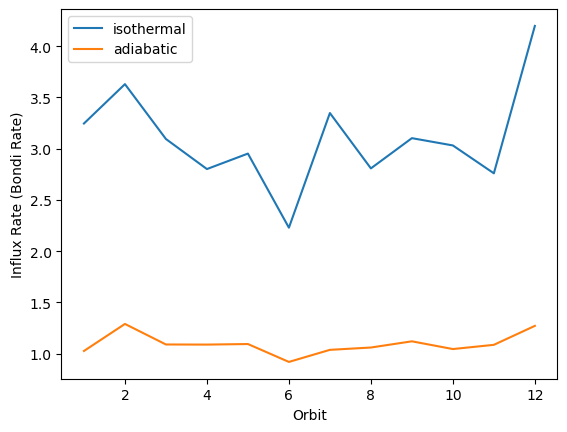

In [16]:
plt.plot(range(1, frames), np.array(mdots)/(qth**2*h**3), label = "isothermal")
plt.plot(range(1, frames), np.array(amdots)/(qth**2*h**3), label = "adiabatic")
plt.xlabel("Orbit")
plt.ylabel("Influx Rate (Bondi Rate)")
plt.legend()
#plt.ylim(0, 1.5*choksi)
plt.show()

In [17]:
orbit = 1
path = "/scratch/afkirby/Runaway/ResolutionStudy/"
label = "h50_1p10E_e0_PPM4"

data1 = load_3D_data(path, 240, 432, 144, label, orbit)
data2 = load_3D_data(path, 288, 528, 192, label, orbit)
data3 = load_3D_data(path, 336, 624, 240, label, orbit)
data4 = load_3D_data(path, 432, 768, 288, label, orbit)
data5 = load_3D_data(path, 528, 912, 336, label, orbit)

In [18]:
resmdots = np.zeros(5)
resmdots[0] = getMDot3DPlus(min(rb3, rh3), 101, 101, planetCoords, planetVel, data1)/(qth**2*h**3)
resmdots[1] = getMDot3DPlus(min(rb3, rh3), 101, 101, planetCoords, planetVel, data2)/(qth**2*h**3)
resmdots[2] = getMDot3DPlus(min(rb3, rh3), 101, 101, planetCoords, planetVel, data3)/(qth**2*h**3)
resmdots[3] = getMDot3DPlus(min(rb3, rh3), 101, 101, planetCoords, planetVel, data4)/(qth**2*h**3)
resmdots[4] = getMDot3DPlus(min(rb3, rh3), 101, 101, planetCoords, planetVel, data5)/(qth**2*h**3)

In [24]:
print(resmdots)

[1.09398291 1.15988908 0.89258583 0.82941778 0.93987496]
